# Emerging Technologies Project

In [2]:
import numpy as np
import statsmodels.stats.weightstats as stat
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import csv
from numpy.polynomial.polynomial import polyfit
from statistics import mean
import sklearn.cluster as skcl

Total for the speed column 6295.198999999994
Total for the power column 24007.292
Speed mean 12.590398000000002
Power mean 48.014584


Text(0, 0.5, 'Power')

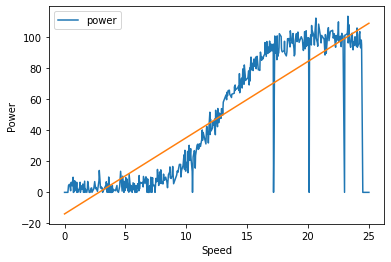

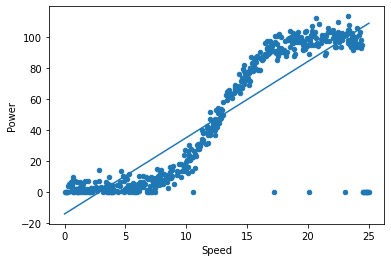

In [51]:
speedPowerFile = "powerproduction.csv"
speedPower = pd.read_csv(speedPowerFile)

cr = csv.reader(open(speedPowerFile,"r"))
df = pd.read_csv(speedPowerFile)

# To skip the header.
next(cr)

speedTotal = 0
powerTotal = 0

speedValues = []
powerValues = []

rowtotalValues = []

for row in cr:  
    speedTotal += float(row[0])
    powerTotal += float(row[1])
    speedValues.append(row[0])
    powerValues.append(row[1])

speedValues = [float(i) for i in speedValues]
powerValues = [float(i) for i in powerValues]

print("Total for the speed column", speedTotal)
print("Total for the power column", powerTotal)
print("Speed mean", np.mean(speedValues))
print("Power mean", np.mean(powerValues))

speedPower.plot(x = "speed", y = "power")
# Line of best fit https://stackoverflow.com/a/31800660.
plt.plot(speedValues, np.poly1d(np.polyfit(speedValues, powerValues, 1))(speedValues))
plt.xlabel("Speed")
plt.ylabel("Power")

speedPower.plot.scatter(x = "speed",y = "power")
plt.plot(speedValues, np.poly1d(np.polyfit(speedValues, powerValues, 1))(speedValues))
plt.xlabel("Speed")
plt.ylabel("Power")

In [52]:
speedPower.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


In [83]:
speedPower

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [71]:
print(speedPower["speed"])

0       0.000
1       0.125
2       0.150
3       0.225
4       0.275
        ...  
495    24.775
496    24.850
497    24.875
498    24.950
499    25.000
Name: speed, Length: 500, dtype: float64


In [24]:
print(speedPower["power"])

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
495    0.0
496    0.0
497    0.0
498    0.0
499    0.0
Name: power, Length: 500, dtype: float64

# Prediction Using Linear Regression

In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [251]:
dataset = pd.read_csv("powerproduction.csv")
dataset.shape

(500, 2)

In [252]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

-13.603433993820211
[4.89542079]


In [258]:
input = [[22.072]]
y_pred = regressor.predict(input)
print("Prediction is", y_pred, "Actual is 99.46")

Prediction is [94.44829371] Actual is 99.46


In [254]:
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(input, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(input, y_pred))
print("Root Mean Squared Error", np.sqrt(metrics.mean_squared_error(input, y_pred)))

Mean Absolute Error: 50.149022674393635
Mean Squared Error: 2514.9244751968467
Root Mean Squared Error 50.149022674393635
